## **1. 추천 시스템**

### **1) 추천 시스템의 정의**

**추천 시스템**이란 사용자의 취향을 이해하고 맞춤 상품과 콘텐츠를 이용하여 추천해주는 시스템을 의미합니다.  
우리가 자주 사용하는 유튜브나 넷플릭스, 티빙 등의 OTT 플랫폼은 물론 쿠팡, SSG 등 유통 업체에서도 고객 데이터를 기반으로 추천 시스템을 구축하고 있습니다.  


<br>

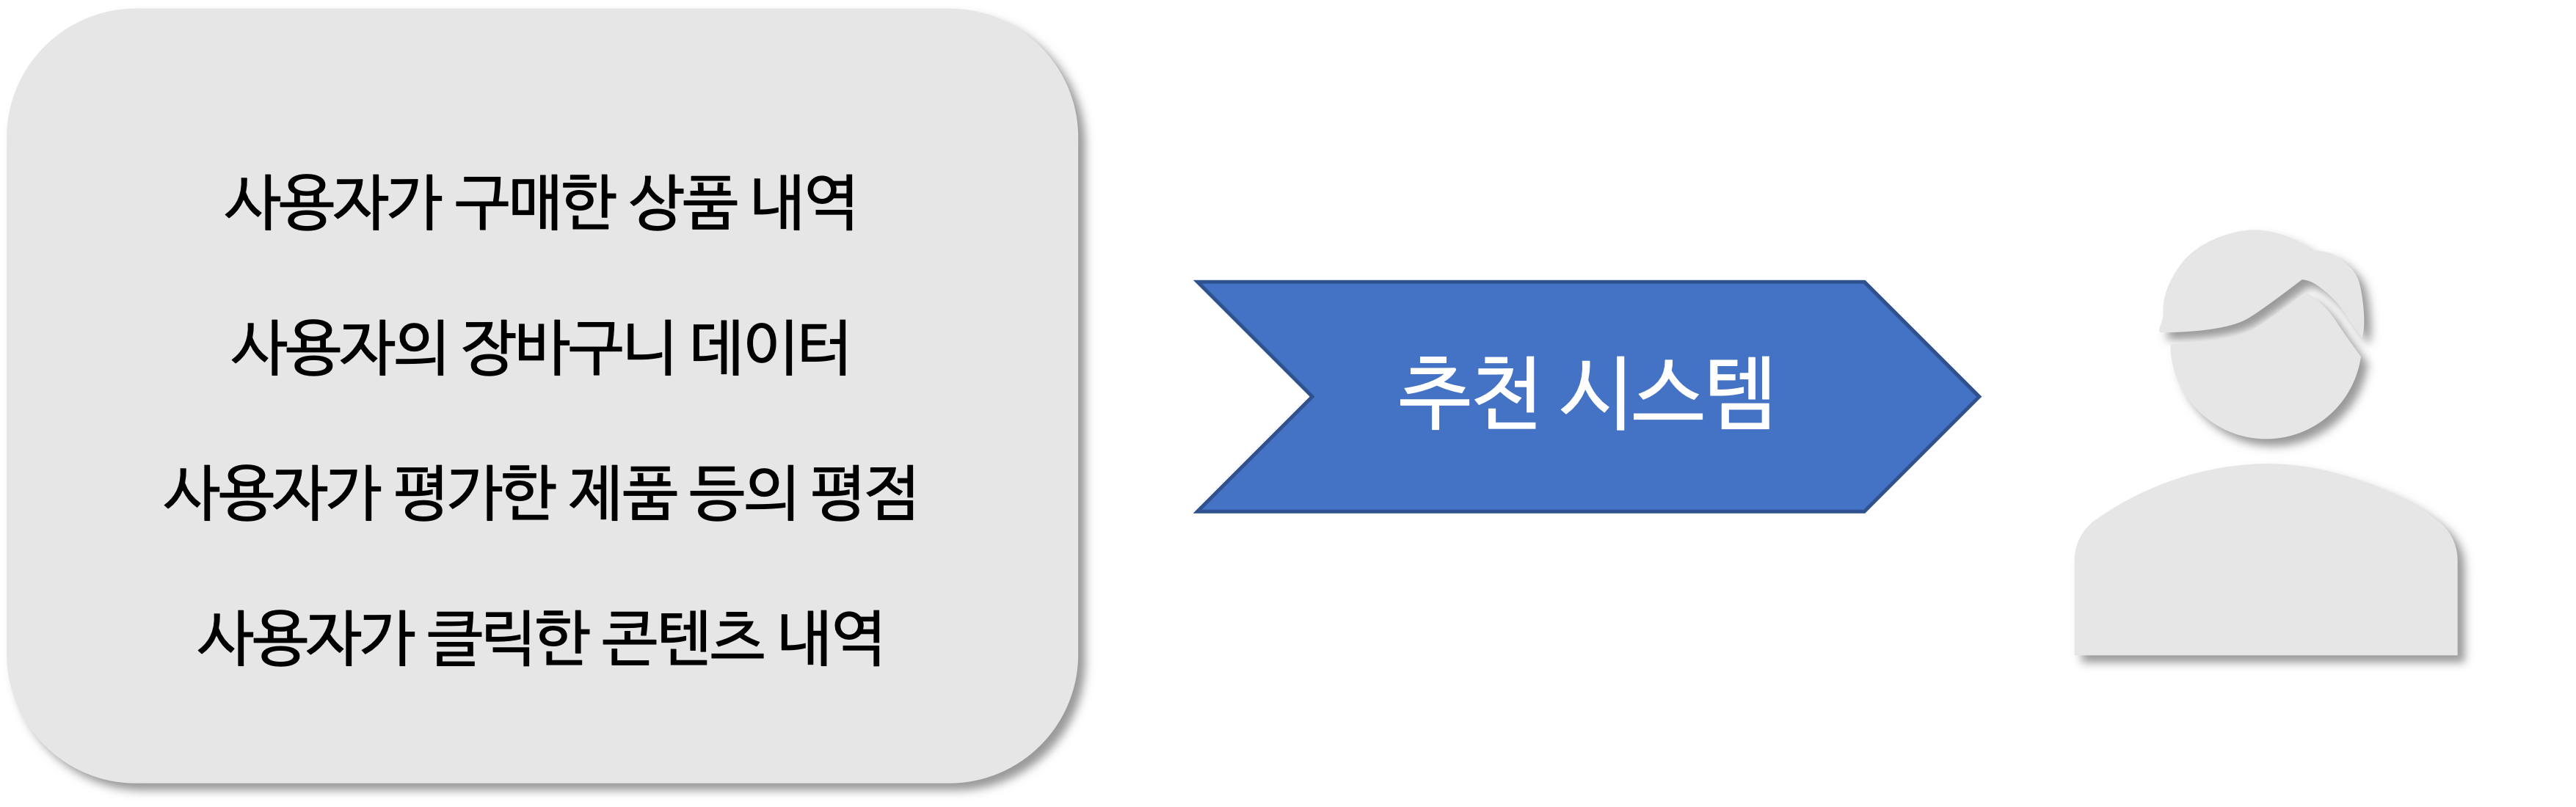

예시로 든 데이터 외에도, 다양한 고객 데이터가 사용될 수 있습니다.

<br>

### **2) 추천 시스템의 유형**  




추천 시스템은 아래 방식처럼 구분됩니다.  
<br>

1. 콘텐츠 기반 필터링(Content based filtering)  

2. 협업 필터링(Collaborative filtering)  

  2-1. 최근접 이웃 협업 필터링(Nearest Neighbor Collaborative filtering)  

  2-2. 잠재 요인 협업 필터링(Latent factor Collaborative filtering)  

<br>

오늘은 **1. 콘텐츠 기반 필터링**에 대해서만 다루고, 협업 필터링은 다음 게시글에서 다루고자 합니다.😁

<br>

## **2. 콘텐츠 기반 필터링 추천 시스템**

### **1) 콘텐츠 기반 필터링 추천 시스템이란?**

콘텐츠 기반 필터링 방식은 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식입니다.  
사용자가 특정 영화에 높은 평점을 줬다면 그 영화의 장르, 출연 배우, 감독, 영화 키워드 등의 콘텐츠와 유사한 다른 영화를 추천해주는 것이죠. 


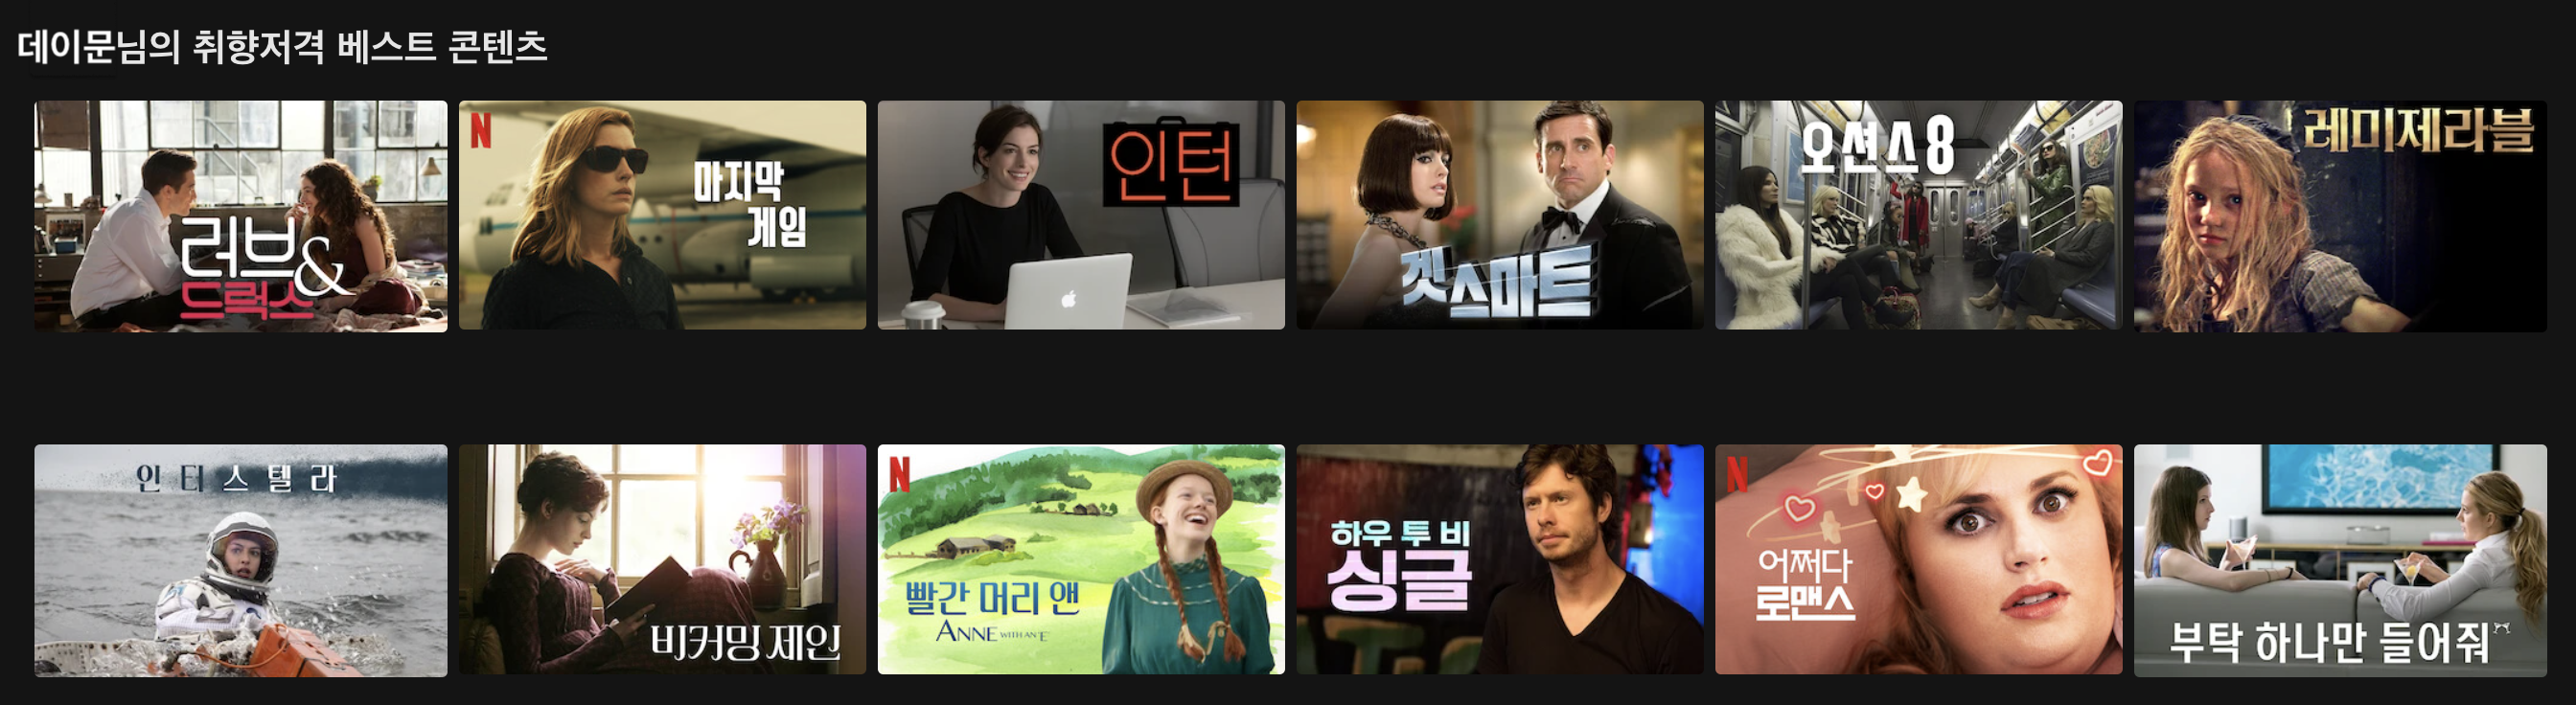

예를 들어, 어떤 사용자가 <*러브 앤 드럭스*> 라는 영화에 높은 평점을 줬다고 가정해 봅시다.  
<br>

<*러브 앤 드럭스*>의 작품 정보는 다음과 같습니다.  

- 장르: 로맨스&코미디  
- 감독: 에드워드 즈윅  
- 주연: 앤 헤서웨이, 제이크 질렌할  
- 키워드: 실화 기반, 사랑, 가족, 연인  

<br>

추천 시스템은 이러한 작품 정보를 기반으로 사용자에게 작품을 추천하게 됩니다.  
주연 배우 정보를 기반으로 앤 헤서웨이의 작품인 <*인턴*>이나 <*오션스 8*>를 추천하거나, 로맨스 코미디 작품인 <*어쩌다 로맨스*>를 추천할 수도 있습니다.

<br>

### **2) TMDB 5000 영화 데이터셋을 이용한 실습**

<br>

TMDB 5000 영화 데이터셋은 유명 영화 데이터 사이트인 IMDB의 많은 영화 중 주요 5,000개 영화에 대한 메타 정보를 가공해 캐글(Kaggle)에서 제공하는 데이터셋입니다.

[KAGGLE_TMDB](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)에 방문하시면 해당 데이터셋을 다운로드하실 수 있습니다.

<br>

#### **[라이브러리 임포트]**

In [3]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

#### **[데이터 불러오기]**

In [4]:
movies = pd.read_csv('./tmdb_5000_movies.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
print('데이터프레임 형태: =',movies.shape,'\n')
print(movies.info())

데이터프레임 형태: = (4803, 20) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 


(4803, 20) 형태의 데이터프레임이며 총 20개 컬럼을 갖고 있습니다.

In [6]:
movies_df = movies[['id','title', 'genres', 'vote_average', 'vote_count',
                 'popularity', 'keywords', 'overview']]

필요한 정보만 담은 movies_df 데이터프레임을 생성해 줍니다.

<br>

In [7]:
pd.set_option('max_colwidth', 100)
movies_df[['genres','keywords']][:1]

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp..."


movies_df의 genres와 keywords를 뽑아서 첫 행을 출력했습니다.  


<br>

다른 컬럼들과 달리 이 두 컬럼은 파이썬 리스트 내부에 여러 개의 딕셔너리가 있는 형태라 주의가 필요합니다. 따라서 이 컬럼들을 먼저 가공해 보겠습니다.

In [8]:
from ast import literal_eval

movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)
movies_df[['genres','keywords']][:1]

,genres,keywords
0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {...","[{'id': 1463, 'name': 'culture clash'}, {'id': 2964, 'name': 'future'}, {'id': 3386, 'name': 'sp..."


파이썬 ast 모듈의 literal_eval() 함수를 이용하면 문자열을 객체로 변환할 수 있습니다.

In [9]:
movies_df['genres'] = movies_df['genres'].apply(lambda x : [ y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [ y['name'] for y in x])

[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]와 같은 genres 칼럼에서 장르명은 딕셔너리의 key 값으로 잡혀 있습니다.   
apply lambda 식을 이용하면 리스트 내 여러 개 딕셔너리의 name 키에 해당하는 값을 찾아 리스트 객체로 변환할 수 있습니다.

In [10]:
movies_df[['genres', 'keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa..."


genres에는 컬럼에는 작품에 해당하는 다양한 장르들이 혼재되어 있습니다.  

작품 간 장르 유사도를 측정하려면 genres를 문자열로 변경한 뒤 CountVectorizer로 피처벡터화한 행렬 데이터 값을 코사인 유사도로 비교해야 합니다.

<br>

#### **1. CountVectorizer 벡터화**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer를 적용하기 위해 공백문자로 word 단위가 구분되는 문자열로 변환. 
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))
count_vect = CountVectorizer(min_df=0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

(4803, 276)


4803개 레코드와 276개 개별 단어 피처로 구성된 피처 벡터 행렬이 만들어졌습니다. 

<br>

#### **2. 코사인 유사도 비교**

In [21]:
genre_mat.toarray()

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:2])


(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]]


사이킷 런의 cosine_similarity를 이용하면 코사인 유사도를 계산할 수 있습니다.  
코사인 유사도 행렬의 모양을 출력하고 앞 2개 데이터를 추출했습니다.

<br>

In [26]:
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1]
print(genre_sim_sorted_ind[:1])

[[   0 3494  813 ... 3038 3037 2401]]


높은 순으로 정렬된 비교 행 위치 인덱스 값을 가져오고 그중에 0번 레코드의 비교 행 위치 인덱스 값만 추출했습니다.  
0번 레코드의 경우 자기 자신인 0번을 제외하면 3494번 레코드와의 유사도가 가장 높고, 2401번 레코드와의 유사도가 가장 높다고 해석할 수 있습니다.

<BR>

#### **3. 장르 유사도에 따른 영화 추천**

In [27]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    
    # 인자로 입력된 movies_df DataFrame에서 'title' 컬럼이 입력된 title_name 값인 DataFrame추출
    title_movie = df[df['title'] == title_name]
    
    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]
    
    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes]


특정 영화와 장르별 유사도가 높은 영화를 반환하는 함수를 생성합니다.

In [28]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average']]

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,title,vote_average
2731,The Godfather: Part II,8.3
1243,Mean Streets,7.2
3636,Light Sleeper,5.7
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0
2640,Things to Do in Denver When You're Dead,6.7
4065,Mi America,0.0
1847,GoodFellas,8.2
4217,Kids,6.8
883,Catch Me If You Can,7.7
3866,City of God,8.1


영화 <*대부(The Godfather)*>와 유사한 영화 10개를 추천한 결과입니다. 

다만 평점이 0점인 영화를 추천하기에는 무리가 있으므로, 평점 정보를 적용해야 할 필요가 있습니다.

In [29]:
movies_df[['title','vote_average','vote_count']].sort_values('vote_average', ascending=False)[:10]

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


평점이 높은 영화를 내림차순으로 10개 출력했습니다.  
평점을 매긴 횟수가 1회에서 8,205회까지 편차가 크므로 가중 평점을 부여하는 것이 적절해 보입니다.  
IMDB의 가중평점 공식을 차용하겠습니다.

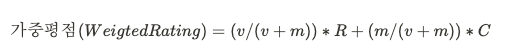
> - v: 개별 영화에 평점을 투표한 횟수  
- m: 평점을 부여하기 위한 최소 투표 횟수  
- R: 개별 영화에 대한 평균 평점  
- C: 전체 영화에 대한 평균 평점

In [30]:
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6)
print('C:',round(C,3), 'm:',round(m,3))

C: 6.092 m: 370.2


전체 영화에 대한 평균 평점은 6.092 점,  
최소 투표 횟수는 370.2회로 계산되었습니다.

<br>

In [31]:
percentile = 0.6
m = movies_df['vote_count'].quantile(percentile)
C = movies_df['vote_average'].mean()

def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return ( (v/(v+m)) * R ) + ( (m/(m+v)) * C )   

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1) 


기존 평점을 가중 평점으로 변환하는 함수 weighted_vote_average()를 생성합니다.  
변환 결과, movies_df에 ['weighted_vote']라는 컬럼이 만들어집니다.

<br>

In [32]:
movies_df[['title','vote_average','weighted_vote','vote_count']].sort_values('weighted_vote',
                                                                          ascending=False)[:10]


,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


가중평균이 잘 계산되었습니다.

<br>

In [33]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    title_movie = df[df['title'] == title_name]
    title_index = title_movie.index.values
    
    # top_n의 2배에 해당하는 쟝르 유사성이 높은 index 추출 
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1)
# 기준 영화 index는 제외
    similar_indexes = similar_indexes[similar_indexes != title_index]
    
    # top_n의 2배에 해당하는 후보군에서 weighted_vote 높은 순으로 top_n 만큼 추출 
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average', 'weighted_vote']]


,title,vote_average,weighted_vote
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
883,Catch Me If You Can,7.7,7.557097
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525
1243,Mean Streets,7.2,6.626569
2839,Rounders,6.9,6.530427


새롭게 정의된 평점 기준에 따라 다시 영화를 추천한 결과입니다.

<BR>

---

영화는 메세지, 분위기 등 다양한 요소를 담고 있기 때문에 장르만으로 개인 취향을 모두 반영하기에는 어려움이 있습니다.  
배우, 감독 등 다양한 컬럼을 이용해 다양한 콘텐츠 기반의 추천 시스템을 구현해볼 수 있을 것입니다.